In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# %matplotlib inline

excel_file_path = "../EDA/Titanic_EDA/train.csv"
df = pd.read_csv(excel_file_path, encoding="latin-1")
mean = df["Age"].mean()
df["Age"].fillna(mean, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
# preparing training and test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df[["Age","Fare"]],
    df["Survived"],
    test_size=0.3,
)
x_train.shape, x_test.shape

((623, 2), (268, 2))

before bining
0.6193732193732193


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


after bining
0.6343304843304843


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


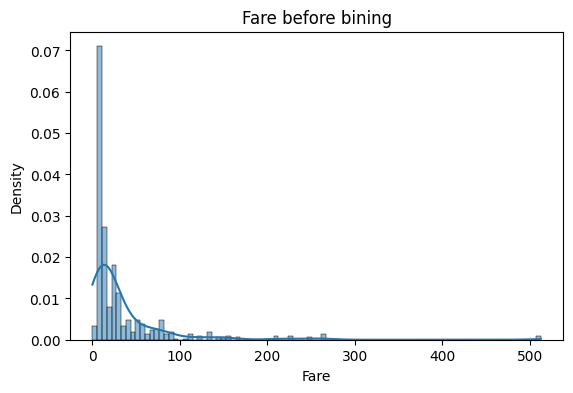

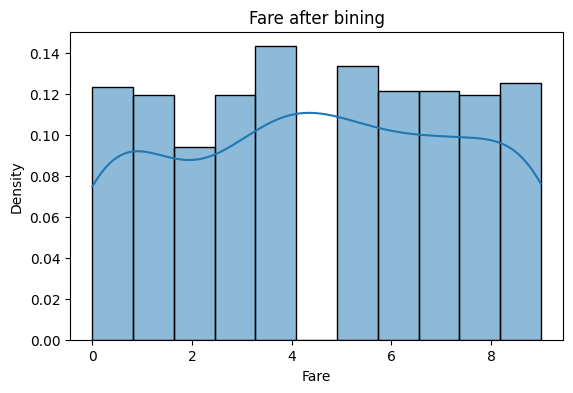

In [38]:
from scipy import stats
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier


def discrete_bining(bins, strategy, feature, x_train_inp, x_test_inp):
    print('before bining')
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x_test_inp,y_test,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train_inp[feature],kde=True, stat="density", log_scale=False)
    plt.title(f"{feature} before bining")

    print('after bining')

    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    trf= ColumnTransformer([('first',kbin_age,[0]),('second',kbin_fare,[1])])

    x_train_inp_trf = trf.fit_transform(x_train_inp)
    x_test_inp_trf = trf.transform(x_test_inp)

    print(np.mean(cross_val_score(DecisionTreeClassifier(),x_test_inp_trf,y_test,cv=10,scoring='accuracy')))

    x_train_inp_trf = pd.DataFrame(x_train_inp_trf, columns=x_train_inp.columns)

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train_inp_trf[feature],kde=True, stat="density", log_scale=False)
    plt.title(f"{feature} after bining")

    plt.show()

discrete_bining(10,'quantile','Fare', x_train, x_test)